# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
df = pd.read_csv('data/human_body_temperature.csv')


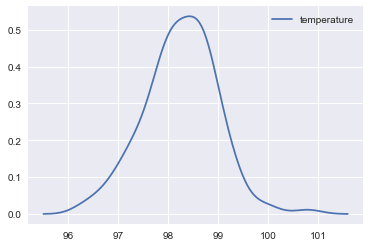

In [16]:
sns.kdeplot(df.temperature)


#### Ans1-The Temperature Distribution is normal

In [18]:
df.shape

(130, 3)

#### Ans2- Yes the sample size is large and observation are independent

#### Ans3-Here we will be using one sample two tailed t-test as we have only one mean to compare and population variance is unknown

#### Lets say $a$=0.05, H0:$u$ = 98.6, H1:$u$$\neq$ 98.6

In [31]:
samp=df.sample(n=50)
spy.stats.ttest_1samp(a=samp.temperature,popmean=98.6)

Ttest_1sampResult(statistic=-3.7600545751792853, pvalue=0.00045339345205291589)

#### As pvalue < 0.05 we reject the null hypothesis and accepts the alternate hypothesis that the true population mean is not 98.6$^o$F

#### Applying a z-test

In [49]:
samp.mean()

temperature    98.228
heart_rate     73.120
dtype: float64

In [50]:
sd

temperature    0.733183
heart_rate     7.062077
dtype: float64

In [48]:
sd=df.std()
z=((98.228-98.6)/(0.733/50**(1/2.0)))
z

-3.5885910313969385

#### For $a$=0.05,z=-3.58 with pvalue = 0.0003325 which is not in between -1.96 to 1.96,so we reject the null and accepts the alternate hypothesis

#### Ans5-Using two sample t test, as no standard deviation for population mean is given, to find out whether there is any significance different in normal temperature between males and females

#### H0:There is a significant difference in normal temp of males and females
H1:There is no significant difference, $a$=0.05

In [91]:
male=df[df.gender == 'M']
afm=df[df.gender == 'F']
spy.stats.ttest_ind(a=male.temperature,b=fm.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

#### As p<$a$, the alternate hypothesis it true